# **FINE TUNING**
This time we are going to use our pretrained model with **tf.keras.application** and apply them to our own problem.

In [1]:
import zipfile

In [2]:
!wget "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip"

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()


--2024-08-22 03:07:27--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.217.207, 142.251.107.207, 74.125.196.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.217.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  97.9MB/s    in 1.6s    

2024-08-22 03:07:28 (97.9 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [3]:
# creating training and testing directory
train_dir="/content/10_food_classes_10_percent/train/"
test_dir="/content/10_food_classes_10_percent/test/"

In [4]:
 import tensorflow as tf
 IMG_SIZE=(224,224)
 train_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                           image_size=IMG_SIZE,
                                                                           batch_size=32,
                                                                           label_mode="categorical" )
 test_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                           image_size=IMG_SIZE,
                                                                           batch_size=32,
                                                                           label_mode="categorical"
                                                                           )

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [5]:
# checking out the class names
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [6]:
for images,labels in train_data_10_percent.take(1):
  print(images,labels)

tf.Tensor(
[[[[2.35056122e+02 2.30056122e+02 2.24056122e+02]
   [2.35239792e+02 2.30239792e+02 2.24239792e+02]
   [2.34158157e+02 2.29158157e+02 2.23586731e+02]
   ...
   [1.23265772e+01 7.96936893e+00 1.17551050e+01]
   [1.41836281e+01 8.18362808e+00 1.21836281e+01]
   [1.08725061e+01 4.87250614e+00 8.87250614e+00]]

  [[2.38852036e+02 2.33852036e+02 2.29852036e+02]
   [2.28770416e+02 2.23770416e+02 2.19770416e+02]
   [2.29096939e+02 2.24096939e+02 2.20096939e+02]
   ...
   [1.06887932e+01 6.33158493e+00 1.01173210e+01]
   [1.47908182e+01 9.79081821e+00 1.37908182e+01]
   [1.42857494e+01 9.28574944e+00 1.32857494e+01]]

  [[2.42280609e+02 2.37494904e+02 2.33709183e+02]
   [2.40127548e+02 2.35341827e+02 2.31556122e+02]
   [2.33693878e+02 2.28908157e+02 2.25122452e+02]
   ...
   [9.09182739e+00 6.95408630e+00 1.00000000e+01]
   [7.62754869e+00 6.05612040e+00 8.84183407e+00]
   [1.34185266e+01 1.18470984e+01 1.46328125e+01]]

  ...

  [[1.42224365e+02 1.47224365e+02 1.24224365e+02]
   [1

# **Now from here onwards we use fuctional API instead of Sequential module**

# **model 0: Building a transfer learning feature extraction model using keras functional API.**

In [7]:
# 1.creating a base model with tf.keras.application
base_model=tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

# 2.Freeze the base model
base_model.trainable=False

# 3. create inputs into our model
inputs=tf.keras.layers.Input(shape=(224,224,3),name="input_layer")

# 4. If using model like ResNet50V2,you need to normalize input by rescaling add this to speed up convergence, remove for EfficientNetV2
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5.pass the input to the base_model
x = base_model(inputs)
print(f"shape after passing inputs through our base model:{x.shape}")

# 6. Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

# 7.create the output activation layers
outputs=tf.keras.layers.Dense(10,activation='softmax',name='output_layers')(x)

# 8. combine inputs with the outputs into the model
model_0=tf.keras.Model(inputs,outputs)

# 9. compile the model
model_0.compile(loss=tf.keras.losses.CategoricalCrossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 10.fitting the model
history_0=model_0.fit(train_data_10_percent,
            epochs=5,
            steps_per_epoch=len(train_data_10_percent),
            validation_data=test_data_10_percent,
            validation_steps=int(0.25*len(test_data_10_percent))
            )

24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
shape after passing inputs through our base model:(None, 7, 7, 1280)
After GlobalAveragePooling2D(): (None, 1280)
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 102s 3s/step - accuracy: 0.3166 - loss: 2.0845 - val_accuracy: 0.7352 - val_loss: 1.3055
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


24/24 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7303 - val_loss: 1.3095
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 101s 3s/step - accuracy: 0.7703 - loss: 1.1824 - val_accuracy: 0.8240 - val_loss: 0.8648
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8355 - val_loss: 0.8757
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 119s 4s/step - accuracy: 0.8437 - loss: 0.8047 - val_accuracy: 0.8235 - val_loss: 0.7453


In [8]:
model_0.evaluate(test_data_10_percent)

79/79 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.8356 - loss: 0.7097


[0.703273594379425, 0.8435999751091003]

In [9]:
model_0.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-b0 (Functional)       │ (None, 7, 7, 1280)          │       5,919,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling_layer         │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layers (Dense)                │ (None, 10)                  │          12,810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,957,744 (22.73 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

 Optimizer params: 25,622 (100.09 KB)

**getting feature vector**

let us demonstrate the global average pooling layer
we have a tensor our base model of shape(None,7,7,1280)
but then it passes to the global average pooling layer it turns into (None,1280)

let's see the similar tensor

In [10]:
input_shape=(1,4,4,3) # 4d tensor with 3-rows, 4-columns, 1,4 - 4 sub-tensor inside the 1 tensor
tf.random.set_seed(42)
input_tensor=tf.random.normal(input_shape)
print(f"INPUT TENSOR:\n {input_tensor}")
print()
print()
print(f"Shape of input_tensor:\n {input_tensor.shape}")
print()
print("Now it passing to the globalaverage Layer:")
global_average_pooling_layer = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(input_tensor)
print(f"After GlobalAveragePooling2D(): {global_average_pooling_layer.shape}")
print()
# Pass the random tensor through a global average pooling 2D layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor:\n {global_average_pooled_tensor}\n")



INPUT TENSOR:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.26454744]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.891714   -0.9384712 ]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728497  0.40125778 -1.4145442 ]
   [-0.59318566 -1.6617213   0.33567193]
   [ 0.10815629  0.2347968  -0.56668764]
   [-0.35819843  0.88698626  0.5274477 ]]]]


Shape of input_tensor:
 (1, 4, 4, 3)

Now it passing to the globalaverage Layer:
After GlobalAveragePooling2D(): (1, 3)

2D global average pooled random tensor:
 [[-0.09368646 -0.45840445 -0.28855976]]



# GlobalAveragePooling2D layer

**Question**: What happens with the tf.keras.layers.GlobalAveragePooling2D() layer?

**Ans** :The tf.keras.layers.GlobalAveragePooling2D() layer transforms a 4D tensor into a 2D tensor by averaging the values across the inner-axes.



# **Running a series of transfer learning experiments**



We've seen the incredible results of transfer learning on 10% of the training data, what about 1% of the training data?


**Model 1**: Use feature extraction transfer learning on 1% of the training data with data augmentation.

**Model 2**: Use feature extraction transfer learning on 10% of the training data with data augmentation and save the results to a checkpoint.

**Model 3**: Fine-tune the Model 2 checkpoint on 10% of the training data with data augmentation.

**Model 4**: Fine-tune the Model 2 checkpoint on 100% of the training data with data augmentation.

🔑**NOTE** While all of the experiments will be run on different versions of the training data, they will all be evaluated on the same test dataset, this ensures the results of each experiment are as comparable as possible.

In [11]:
# download and unzip data
!wget "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip"
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_1_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()


--2024-08-22 03:17:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.207, 172.217.203.207, 173.194.215.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   140MB/s    in 0.9s    

2024-08-22 03:17:36 (140 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [12]:
# create train and test directories
train_dir_1_percent="/content/10_food_classes_1_percent/train/"
test_dir_1_percent="/content/10_food_classes_1_percent/test/"

In [13]:
# setup data loaders
IMG_SIZE=(224,224)
train_data_1_percent=tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_1_percent,
                                                                           image_size=IMG_SIZE,
                                                                           batch_size=32,
                                                                           label_mode="categorical" )
test_data_1_percent=tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir_1_percent,
                                                                           image_size=IMG_SIZE,
                                                                           batch_size=32,
                                                                           label_mode="categorical"
                                                                           )

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


# **ADDING DATA-AUGMENTATION RIGHT INTO OUR MODEL.**
To add data augmentation right into our model,we can use into the layer inside:


*   tf.keras.layers.experiment.preprocessing()



In [14]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# create a data augmentation stage with horizontal flipping,rotation ,zooming,etc
data_augmentation=keras.Sequential([
   layers.RandomFlip("horizontal"),
   layers.RandomRotation(0.2),
   layers.RandomZoom(0.2),
   layers.RandomHeight(0.2),
   layers.RandomWidth(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetV2B0
], name ="data_augmentation")


# Visualize our data augmentation layer( and see what happens to our layers)

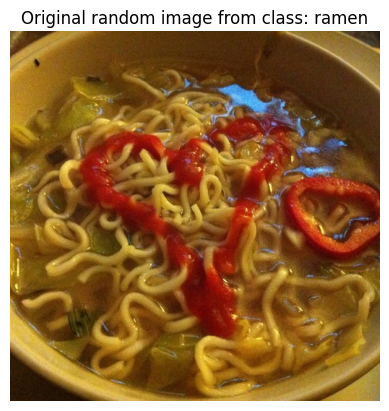

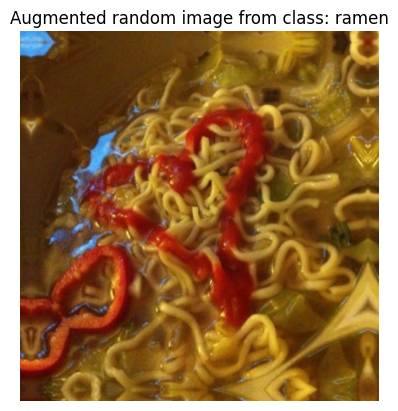

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names) # choose a random class
target_dir = "10_food_classes_1_percent/train/" + target_class # create the target directory
random_image = random.choice(os.listdir(target_dir)) # choose a random image from target directory
random_image_path = target_dir + "/" + random_image # create the choosen random image path
img = mpimg.imread(random_image_path) # read in the chosen target image
plt.imshow(img) # plot the target image
plt.title(f"Original random image from class: {target_class}")
plt.axis(False); # turn off the axes


# Augment the image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0)) # data augmentation model requires shape (None, height, width, 3)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) # requires normalization after augmentation
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);


# **MODEL-1** Feature extraction transfer learning on 1% of the data with data augmentation

In [17]:
# Setup input shape and base model, freezing the base model layers
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

# Create input layer
inputs = layers.Input(shape=(224,224,3), name="input_layer")

# Add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

# Give base_model inputs (after augmentation) and don't train it
x = base_model(x, training=False)

# Pool output features of base model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Put a dense layer on as the output
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

# Make a model with inputs and outputs
model_1 = keras.Model(inputs, outputs)

# Compile the model
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1_percent = model_1.fit(train_data_1_percent,
                    epochs=5,
                    steps_per_epoch=len(train_data_1_percent),
                    validation_data=test_data_1_percent,
                    validation_steps=int(0.25* len(test_data_1_percent)))

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "functional_1" is incompatible with the layer: expected shape=(None, 512, 512, 3), found shape=(None, 224, 224, 3)[0m

Arguments received by Sequential.call():
  • args=('<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=None, name=input_layer>',)
  • kwargs={'mask': 'None'}

# **MODEL 2**: Feature extraction transfer learning with 10% of data and data augmentation

In [ ]:

# Get 10% of the data of the 10 classes (uncomment if you haven't gotten "10_food_classes_10_percent.zip" already)
# download and unzip data
!wget "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip"
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_1_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()


In [ ]:
# setting up train and test directories
train_dir_10_percent = "10_food_classes_10_percent/train/"
test_dir_10_percent = "10_food_classes_10_percent/test/"

In [ ]:
# setup data loaders
IMG_SIZE=(224,224)
train_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_10_percent,
                                                                           image_size=IMG_SIZE,
                                                                           batch_size=32,
                                                                           label_mode="categorical" )
test_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir_10_percent,
                                                                           image_size=IMG_SIZE,
                                                                           batch_size=32,
                                                                           label_mode="categorical"
                                                                           )

# DATA AUGMENTATION

In [ ]:
# Create a functional model with data augmentation
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers.experimental import preprocessing # OLD

# NEW: Newer versions of TensorFlow (2.10+) can use the tensorflow.keras.layers API directly for data augmentation
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNet
], name ="data_augmentation")

# Setup the input shape to our model
input_shape = (224, 224, 3)

# Create a frozen base model
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

# Create input and output layers
inputs = layers.Input(shape=input_shape, name="input_layer") # create input layer
x = data_augmentation(inputs) # augment our training images
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)
model_2 = tf.keras.Model(inputs, outputs)

# Compile
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # use Adam optimizer with base learning rate
              metrics=["accuracy"])